# Atividade 2 - Etapa 2

In [1]:
# importação do dataset
import pandas as pd

df = pd.read_csv('dataset/articles.csv', encoding='utf8')
print('linhas, colunas):', df.shape)

df.head()

linhas, colunas): (167053, 6)


,title,text,date,category,subcategory,link
0,"Lula diz que está 'lascado', mas que ainda tem...",Com a possibilidade de uma condenação impedir ...,2017-09-10,poder,NaN,http://www1.folha.uol.com.br/poder/2017/10/192...
1,"'Decidi ser escrava das mulheres que sofrem', ...","Para Oumou Sangaré, cantora e ativista malines...",2017-09-10,ilustrada,NaN,http://www1.folha.uol.com.br/ilustrada/2017/10...
2,Três reportagens da Folha ganham Prêmio Petrob...,Três reportagens da Folha foram vencedoras do ...,2017-09-10,poder,NaN,http://www1.folha.uol.com.br/poder/2017/10/192...
3,Filme 'Star Wars: Os Últimos Jedi' ganha trail...,A Disney divulgou na noite desta segunda-feira...,2017-09-10,ilustrada,NaN,http://www1.folha.uol.com.br/ilustrada/2017/10...
4,CBSS inicia acordos com fintechs e quer 30% do...,"O CBSS, banco da holding Elopar dos sócios Bra...",2017-09-10,mercado,NaN,http://www1.folha.uol.com.br/mercado/2017/10/1...


**Ajustes para aprendizado - já realizados na Etapa1_v02**

In [2]:
df.drop_duplicates(subset=['text'], inplace=True)
df.drop(['subcategory', 'link', 'date'], axis=1, inplace=True)
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

df.head()

,title,text,category
0,"Lula diz que está 'lascado', mas que ainda tem...",Com a possibilidade de uma condenação impedir ...,poder
1,"'Decidi ser escrava das mulheres que sofrem', ...","Para Oumou Sangaré, cantora e ativista malines...",ilustrada
2,Três reportagens da Folha ganham Prêmio Petrob...,Três reportagens da Folha foram vencedoras do ...,poder
3,Filme 'Star Wars: Os Últimos Jedi' ganha trail...,A Disney divulgou na noite desta segunda-feira...,ilustrada
4,CBSS inicia acordos com fintechs e quer 30% do...,"O CBSS, banco da holding Elopar dos sócios Bra...",mercado


In [3]:
df['category'].value_counts()

category
poder                           22005
colunas                         21499
mercado                         20936
esporte                         19723
mundo                           17123
cotidiano                       16952
ilustrada                       15604
opiniao                          4523
paineldoleitor                   4008
saopaulo                         3953
tec                              2205
educacao                         2113
tv                               2065
turismo                          1902
ilustrissima                     1377
ciencia                          1331
equilibrioesaude                 1311
sobretudo                        1052
bbc                               979
folhinha                          875
empreendedorsocial                841
comida                            828
asmais                            547
ambiente                          490
seminariosfolha                   378
serafina                          331
o-m

**Utilizarei as 7 categorias mais relevantes no treinamento a fim de deixar o dataset mais balanceado**

In [4]:
df = df[df['category'].isin(list(df['category'].value_counts()[:7].index))]

df['category'] = df['category'].replace('guia-de-livros-discos-filmes', 'guia-de-livros-filmes-discos')
alvo, valores = pd.factorize(df['category'], sort=True)
df['target'] = alvo
print('Novo tamanho do dataset:', len(df))
list(enumerate(valores))

Novo tamanho do dataset: 133842


[(0, 'colunas'),
 (1, 'cotidiano'),
 (2, 'esporte'),
 (3, 'ilustrada'),
 (4, 'mercado'),
 (5, 'mundo'),
 (6, 'poder')]

In [5]:
import nltk
import tensorflow as tf
import re, string, unicodedata
import matplotlib.pyplot as plt

from string import punctuation
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize,sent_tokenize
from wordcloud import WordCloud,STOPWORDS

#instalação do modelo 'stopwords'
nltk.download('stopwords')

from bs4 import BeautifulSoup
from tensorflow.keras.preprocessing import text, sequence
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gpesc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Remoção de Palavras Irrelevantes (Stopwords)**

Não acrescentam muito a sentença e podem ser facilmente ignoradas sem sacrificar o significado do texto.

In [6]:
stop = set(stopwords.words('portuguese'))
punctuation = list(string.punctuation)
stop.update(punctuation)

**Limpeza de Texto**

In [7]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('', '', text)

# Removing URL's
def remove_between_square_brackets(text):
    return re.sub(r'http\S+', '', text)

#Removing the stopwords from text
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)

#Removing the noisy text
def denoise_text(text):
    #text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_stopwords(text)
    return text

#Apply function on review column
df['text']=df['text'].apply(denoise_text)

**WORDCLOUD**

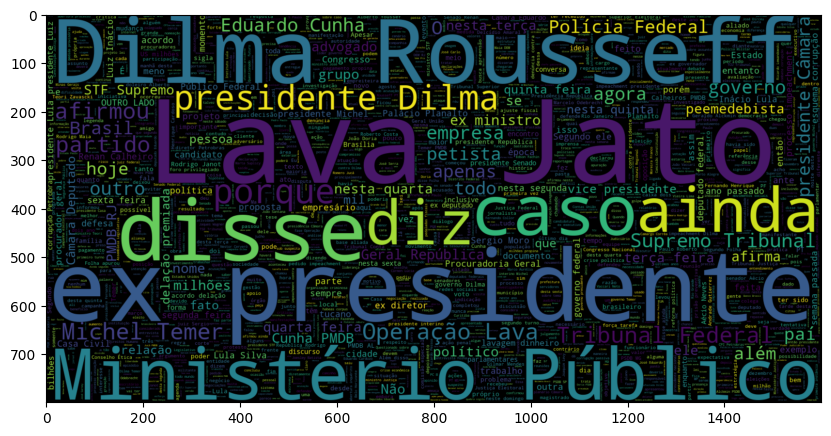

In [8]:
# criação de uma nuvem de palavras para textos da categoria 'poder'
plt.figure(figsize = (10, 10)) # Text that is Not Sarcastic
wc = WordCloud(max_words=2000 , width=1600 , height=800).generate(" ".join(df[df.category == 'poder'].text))
plt.imshow(wc , interpolation = 'bilinear')

### **Introdução à incorporação de palavras e Word2Vec**

Representação do vocabulário de documentos. É capaz de de capturar o contexto de uma palavra em um documento, semelhança semântica e sintática, relação com outras palavras.

Incorporação de palavras: representações vetoriais de uma palavra específica. Word2Vec é uma técnica para aprender incorporações de palavras usando rede neural superficial.

**Convertendo para um formato aceitado pela biblioteca _gensim_**

In [9]:
words = []
for i in df.text.values:
    # se não for string, converte para string
    if not isinstance(i, str):
        i = str(i)
    words.append(i.split())

words[:2]

[['possibilidade',
  'condenação',
  'impedir',
  'candidatura',
  '2018,',
  'ex-presidente',
  'Luiz',
  'Inácio',
  'Lula',
  'Silva',
  'fez,',
  'nesta',
  'segunda',
  '(9),',
  'discurso',
  'inflamado',
  'contra',
  'Lava',
  'Jato,',
  'disse',
  'saber',
  '"lascado",',
  'exigiu',
  'pedido',
  'desculpas',
  'juiz',
  'Sergio',
  'Moro',
  'afirmou',
  'que,',
  'disputa',
  'Planalto,',
  'cabo',
  'eleitoral',
  'expressivo',
  'sucessão',
  'Michel',
  'Temer.',
  'Segundo',
  'petista,',
  'réu',
  'sete',
  'ações',
  'penais,',
  'objetivo',
  'Moro',
  'impedir',
  'candidatura',
  'ano',
  'vem,',
  'desidratando-o,',
  'inclusive,',
  'apoio',
  'nome',
  'alternativo,',
  'ex-prefeito',
  'Paulo',
  'Fernando',
  'Haddad',
  '(PT),',
  'caso',
  'possa',
  'concorrer',
  'Presidência.',
  '"Eu',
  'sei',
  'tô',
  'lascado,',
  'todo',
  'dia',
  'processo.',
  'quero',
  'Moro',
  'absolva,',
  'quero',
  'peça',
  'desculpas",',
  'disse',
  'Lula',
  'durante'

In [10]:
import gensim
# dimensão do vetor a ser gerado
EMBEDDING_DIM = 100
# criando um vetor de palavras através do Método Word2Vec 
w2v_model = gensim.models.Word2Vec(sentences=words, vector_size=EMBEDDING_DIM, window=5, min_count=1)

In [13]:
len(w2v_model.wv.key_to_index)

1100485

In [19]:
tokenizer = text.Tokenizer(num_words=35000)
tokenizer.fit_on_texts(words)
tokenized_train = tokenizer.texts_to_sequences(words)
x = sequence.pad_sequences(tokenized_train , maxlen=20)

In [20]:
# index 0 é reservado, portanto adicionamos 1
vocab_size = len(tokenizer.word_index) + 1
print('Tamanho do vocabulário:', vocab_size)

Tamanho do vocabulário: 976635


In [40]:
import numpy as np

def get_weight_matrix(model, vocab):
    # tamanho total do vocabulário para palavras desconhecidas
    vocab_size = len(vocab) + 1
    
    # definindo a dimensão da matriz de pesos inicializada com 0
    weight_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
    
    # armazena vetores usando o mapeamento inteiro do Tokenizer
    for word, i in vocab.items():
        if word in model.wv:
            weight_matrix[i] = model.wv[word]
        
    return weight_matrix

embedding_vectors = get_weight_matrix(w2v_model, tokenizer.word_index)

In [41]:
print("Tamanho do vocabulário:", vocab_size)
print("Shape dos embedding_vectors:", embedding_vectors.shape)

Tamanho do vocabulário: 976635
Shape dos embedding_vectors: (976635, 100)


### Treinando o modelo Word2Vec

In [42]:
#entradas = len(vocab_size)
saidas = len(valores)

# modelo de rede neural
model = tf.keras.models.Sequential([
    # non trainable embedding layer
    tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=EMBEDDING_DIM, weights=[embedding_vectors], trainable=True, input_length=vocab_size),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=128, recurrent_dropout=0.3, dropout=0.3, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(units=32, recurrent_dropout=0.1, dropout=0.1)),
    tf.keras.layers.Dense(saidas, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['acc'])
del embedding_vectors

c:\Users\gpesc\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [43]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_10 (Embedding)        │ ?                      │    97,663,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_20                │ ?                      │   0 (unbuilt) │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_21                │ ?                      │   0 (unbuilt) │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 97,663,500 (372.56 MB)

 Trainable params: 97,663,500 (372.56 MB)

 Non-trainable params: 0 (0.00 B)

In [83]:
x_train, x_test, y_train, y_test = train_test_split(x, pd.get_dummies(df['target']).values, test_size = 0.3, random_state = 0)

In [84]:
history = model.fit(x_train, y_train, batch_size=128, validation_data=(x_test, y_test), epochs=3)

Epoch 1/3
732/732 ━━━━━━━━━━━━━━━━━━━━ 522s 702ms/step - acc: 0.6777 - loss: 0.2243 - val_acc: 0.7744 - val_loss: 0.1850
Epoch 2/3
732/732 ━━━━━━━━━━━━━━━━━━━━ 511s 698ms/step - acc: 0.8136 - loss: 0.1420 - val_acc: 0.7695 - val_loss: 0.1794
Epoch 3/3
732/732 ━━━━━━━━━━━━━━━━━━━━ 505s 690ms/step - acc: 0.8435 - loss: 0.1213 - val_acc: 0.7660 - val_loss: 0.1788


In [85]:
print("Accuracy of the model on Training Data is - " , model.evaluate(x_train,y_train)[1]*100)
print("Accuracy of the model on Testing Data is - " , model.evaluate(x_test,y_test)[1]*100)

2928/2928 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - acc: 0.8840 - loss: 0.1217
Accuracy of the model on Training Data is -  88.48317265510559
1255/1255 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - acc: 0.7659 - loss: 0.1785
Accuracy of the model on Testing Data is -  76.59701704978943


### **Introdução ao GloVe**

O método GloVe é construído sobre uma ideia importante: você pode derivar relações semânticas entre palavras a partir da matriz de co-ocorrência. Dado um corpus com V palavras, a matriz de co-ocorrência X será uma matriz V x V, onde a i-ésima linha e j-ésima coluna de X, X_ij denota quantas vezes a palavra i co-ocorreu com a palavra j.

In [86]:
x_train, x_test, y_train, y_test = train_test_split(df.text, df.category, test_size = 0.3 , random_state = 0)

max_features = 35000
maxlen = 200

In [87]:
tokenizer = text.Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(x_train)
tokenized_train = tokenizer.texts_to_sequences(x_train)
x_train = sequence.pad_sequences(tokenized_train, maxlen=maxlen)

In [88]:
EMBEDDING_FILE = 'dataset/glove.twitter.27B.200d.txt'

def get_coefs(word, *arr): 
    return word, np.asarray(arr, dtype='float32')

embeddings_index = dict(get_coefs(*o.rstrip().rsplit(' ')) for o in open(EMBEDDING_FILE, encoding='utf8'))

In [89]:
all_embs = np.stack(list(embeddings_index.values()))
emb_mean,emb_std = all_embs.mean(), all_embs.std()
embed_size = all_embs.shape[1]

word_index = tokenizer.word_index
nb_words = min(max_features, len(word_index))
#change below line if computing normal stats is too slow
embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))
for word, i in word_index.items():
    if i >= max_features: continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None: embedding_matrix[i] = embedding_vector

In [90]:
batch_size = 128
epochs = 2
embed_size = 200

In [92]:
#Defining Neural Network
model = Sequential()
#Non-trainable embeddidng layer
model.add(Embedding(nb_words, output_dim=embed_size, weights=[embedding_matrix], trainable=True))
#LSTM 
model.add(Bidirectional(LSTM(units=128 , recurrent_dropout = 0.5 , dropout = 0.5)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=tensorflow.keras.optimizers.Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['acc'])

model.summary()

TypeError: Trainer.compile() got an unexpected keyword argument 'learning_rate'

In [69]:
history = model.fit(x_train, y_train, batch_size = batch_size , validation_data = (x_test, y_test) , epochs = 2)

Epoch 1/2


UnimplementedError: Graph execution error:

Detected at node compile_loss/binary_crossentropy/Cast defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "C:\Users\gpesc\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py", line 18, in <module>

  File "C:\Users\gpesc\AppData\Roaming\Python\Python312\site-packages\traitlets\config\application.py", line 1075, in launch_instance

  File "C:\Users\gpesc\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelapp.py", line 739, in start

  File "C:\Users\gpesc\AppData\Roaming\Python\Python312\site-packages\tornado\platform\asyncio.py", line 205, in start

  File "c:\Users\gpesc\AppData\Local\Programs\Python\Python312\Lib\asyncio\base_events.py", line 641, in run_forever

  File "c:\Users\gpesc\AppData\Local\Programs\Python\Python312\Lib\asyncio\base_events.py", line 1987, in _run_once

  File "c:\Users\gpesc\AppData\Local\Programs\Python\Python312\Lib\asyncio\events.py", line 88, in _run

  File "C:\Users\gpesc\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelbase.py", line 545, in dispatch_queue

  File "C:\Users\gpesc\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelbase.py", line 534, in process_one

  File "C:\Users\gpesc\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelbase.py", line 437, in dispatch_shell

  File "C:\Users\gpesc\AppData\Roaming\Python\Python312\site-packages\ipykernel\ipkernel.py", line 362, in execute_request

  File "C:\Users\gpesc\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelbase.py", line 778, in execute_request

  File "C:\Users\gpesc\AppData\Roaming\Python\Python312\site-packages\ipykernel\ipkernel.py", line 449, in do_execute

  File "C:\Users\gpesc\AppData\Roaming\Python\Python312\site-packages\ipykernel\zmqshell.py", line 549, in run_cell

  File "C:\Users\gpesc\AppData\Roaming\Python\Python312\site-packages\IPython\core\interactiveshell.py", line 3075, in run_cell

  File "C:\Users\gpesc\AppData\Roaming\Python\Python312\site-packages\IPython\core\interactiveshell.py", line 3130, in _run_cell

  File "C:\Users\gpesc\AppData\Roaming\Python\Python312\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "C:\Users\gpesc\AppData\Roaming\Python\Python312\site-packages\IPython\core\interactiveshell.py", line 3334, in run_cell_async

  File "C:\Users\gpesc\AppData\Roaming\Python\Python312\site-packages\IPython\core\interactiveshell.py", line 3517, in run_ast_nodes

  File "C:\Users\gpesc\AppData\Roaming\Python\Python312\site-packages\IPython\core\interactiveshell.py", line 3577, in run_code

  File "C:\Users\gpesc\AppData\Local\Temp\ipykernel_8104\1964911794.py", line 1, in <module>

  File "c:\Users\gpesc\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "c:\Users\gpesc\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 314, in fit

  File "c:\Users\gpesc\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 117, in one_step_on_iterator

  File "c:\Users\gpesc\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 104, in one_step_on_data

  File "c:\Users\gpesc\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 54, in train_step

  File "c:\Users\gpesc\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\trainer.py", line 316, in compute_loss

  File "c:\Users\gpesc\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\compile_utils.py", line 609, in __call__

  File "c:\Users\gpesc\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\compile_utils.py", line 645, in call

  File "c:\Users\gpesc\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\losses\loss.py", line 39, in __call__

  File "c:\Users\gpesc\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\tree\tree_api.py", line 148, in map_structure

  File "c:\Users\gpesc\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\tree\optree_impl.py", line 79, in map_structure

  File "c:\Users\gpesc\AppData\Local\Programs\Python\Python312\Lib\site-packages\optree\ops.py", line 594, in tree_map

  File "c:\Users\gpesc\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\losses\loss.py", line 40, in <lambda>

  File "c:\Users\gpesc\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\ops\core.py", line 495, in convert_to_tensor

  File "c:\Users\gpesc\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\backend\tensorflow\core.py", line 120, in convert_to_tensor

Cast string to float is not supported
	 [[{{node compile_loss/binary_crossentropy/Cast}}]] [Op:__inference_one_step_on_iterator_67748]

In [ ]:
print("Accuracy of the model on Testing Data is - " , model.evaluate(x_test, y_test)[1]*100)